In [6]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')


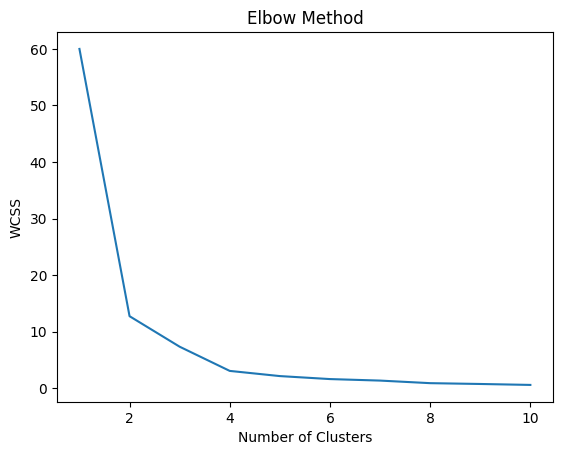

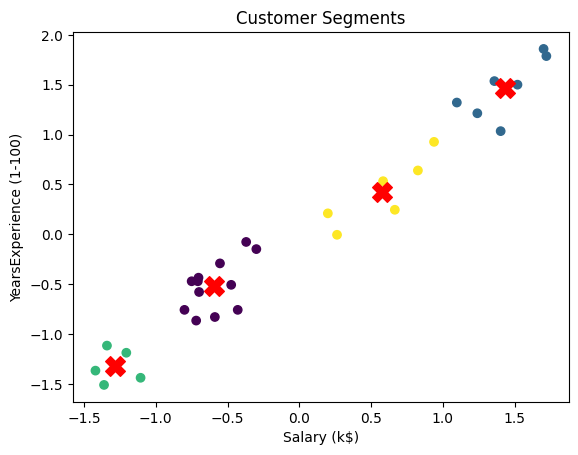

In [5]:
# Import necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the customer dataset
data = pd.read_csv('salary_dataset.csv') # Replace with actual dataset path
print(data.columns)

# Preprocessing: Selecting relevant features
X = data[['Salary', 'YearsExperience']]

# Standardizing the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find the optimal number of clusters 
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(X_scaled) 
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss) 
plt.title('Elbow Method') 
plt.xlabel('Number of Clusters') 
plt.ylabel('WCSS')
plt.show()

# Applying K-Means with optimal clusters (k=4) 
kmeans = KMeans(n_clusters=4, random_state=42) 
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_
# Visualizing the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X') 
plt.title('Customer Segments')
plt.xlabel('Salary (k$)') 
plt.ylabel('YearsExperience (1-100)') 
plt.show()


Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')


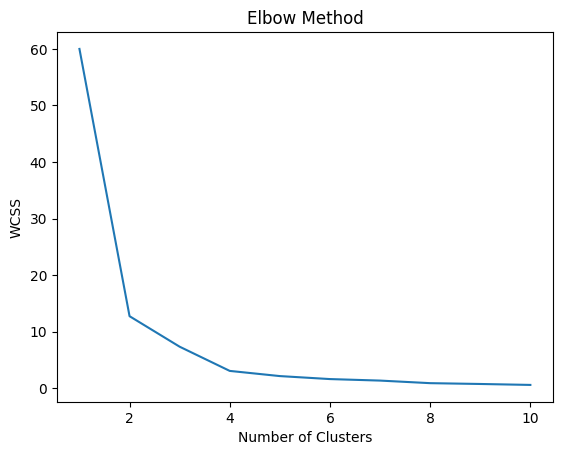

Silhouette Score: 0.5985273435130939


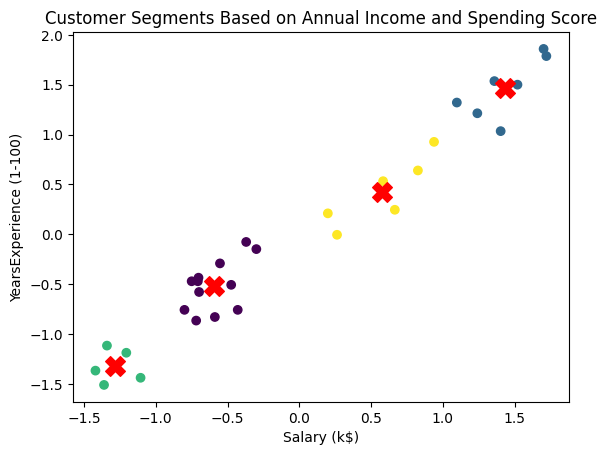

In [6]:
# Import necessary libraries
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
import pandas as pd
import matplotlib.pyplot as plt

# Load the customer dataset
data = pd.read_csv('salary_dataset.csv') # Replace with actual dataset path
print(data.columns)

# Preprocessing: Selecting relevant features
X = data[['Salary', 'YearsExperience']]

# Standardize the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find the optimal number of clusters
wcss = [] # List to store within-cluster sum of squares (WCSS) 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(X_scaled) 
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph 
plt.plot(range(1, 11), wcss) 
plt.title('Elbow Method') 
plt.xlabel('Number of Clusters') 
plt.ylabel('WCSS')
plt.show()

# From the Elbow Method, suppose the optimal k is 4 (you can change it based on your plot) 
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42) 
kmeans.fit(X_scaled)

# From the Elbow Method, suppose the optimal k is 4 (you can change it based on your plot) 
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42) 
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataset 
data['Cluster'] = kmeans.labels_

# Calculate the Silhouette Score
sil_score = silhouette_score(X_scaled, kmeans.labels_) 
print(f"Silhouette Score: {sil_score}")

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X') 
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.xlabel('Salary (k$)') 
plt.ylabel('YearsExperience (1-100)') 
plt.show()


In [3]:
pip install tensorflow

  Using cached tensorflow-2.20.0-cp312-cp312-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-1.17.3-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached h5py-3.14.0-cp312-cp312-win_amd64.whl.metadata (2.7 kB)
  Using cached ml_dtypes-0.5.3-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
  Using cached mark

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    silhouette_avg = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters (k): {optimal_k}')
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(X_train_scaled)

def plot_cluster_images(cluster_labels, cluster_number):
    plt.figure(figsize=(10, 10))
    cluster_indices = np.where(cluster_labels == cluster_number)[0]
    
    for i in range(min(25, len(cluster_indices))):
        plt.subplot(5, 5, i + 1)
        plt.imshow(X_train[cluster_indices[i]], cmap='gray')
        plt.axis('off')
    plt.title(f'Cluster {cluster_number}')
    plt.show()
    
for cluster_number in range(optimal_k):
    plot_cluster_images(kmeans_optimal.labels_, cluster_number)

KeyboardInterrupt: 

Accuracy with euclidean distance: 0.0000
Accuracy with manhattan distance: 0.0000
Accuracy with minkowski distance: 0.0000


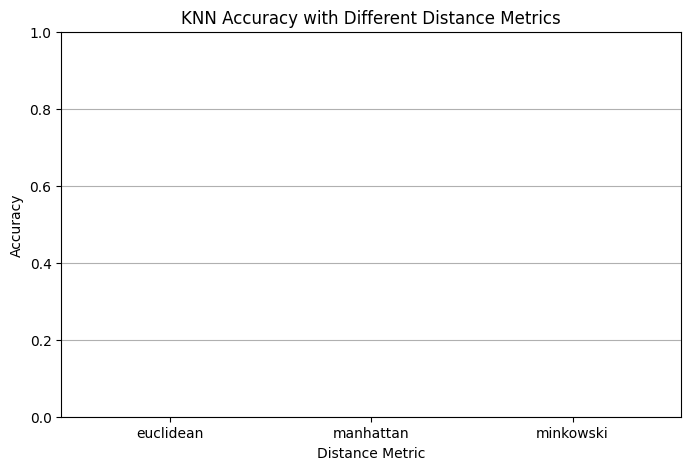

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('salary_dataset.csv') 
X = data.drop('Unnamed: 0', axis=1)
y = data['Unnamed: 0']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

distance_metrics = ['euclidean', 'manhattan', 'minkowski']
accuracy_results = {}

for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[metric] = accuracy
    
for metric, accuracy in accuracy_results.items():
    print(f'Accuracy with {metric} distance: {accuracy:.4f}')
    
plt.figure(figsize=(8, 5))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['blue', 'orange', 'green'])
plt.title('KNN Accuracy with Different Distance Metrics')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()